In [181]:
#importing all necesessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [182]:
#importing data from github and converting into a DataFrame
data_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
data_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')



In [183]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [184]:
data_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [185]:
#finding number of rows and columns
data_train.shape

(8523, 12)

In [186]:
#understanding the data at high level i.e. checking the statistics of the data
data_train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [187]:
#finding the null values in each column
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [188]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(), inplace=True)
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0], inplace=True)

In [189]:
#finding number of unique values in Outlet_Size column
(pd.unique(data_train['Outlet_Size']))

array(['Medium', 'High', 'Small'], dtype=object)

In [190]:
#finding number of unique values in Item_Fat_Content column
(pd.unique(data_train['Item_Fat_Content']))

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [191]:
#finding number of unique values in Item_Identifier column
(pd.unique(data_train['Item_Identifier']))

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [192]:

#finding number of unique values in Outlet_Identifier column
(pd.unique(data_train['Outlet_Identifier']))

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [193]:
#finding number of unique values in Outlet_Location_Type column
(pd.unique(data_train['Outlet_Location_Type']))

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [194]:
#finding number of unique values in Outlet_Type column
(pd.unique(data_train['Outlet_Type']))

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [195]:
#finding number of unique values in Item_Type column
(pd.unique(data_train['Item_Type']))

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [196]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [198]:
#checking if the null values are filled
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [199]:
#now lets convert the columns having string values into integer values
data_train.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}, 'Item_Fat_Content':{'Low Fat':0,'Regular':1,'low fat':0,'LF':0,'reg':1}, 'Outlet_Location_Type':{'Tier 1':0,'Tier 2':2,'Tier 3':3},'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,}}, inplace=True)


In [200]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,3,1,994.7052


In [201]:
data_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,3,1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,2,1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,2,1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,3,2,1845.5976
8522,DRG01,14.800,0,0.044878,Soft Drinks,75.4670,OUT046,1997,0,0,1,765.6700


In [202]:
#now lets delete some columns which are not important in finding the output 
data_train=data_train.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type'])


In [203]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380
1,5.92,1,0.019278,48.2692,2009,1,3,443.4228
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700
3,19.20,1,0.000000,182.0950,1998,1,3,732.3800
4,8.93,0,0.000000,53.8614,1987,2,3,994.7052


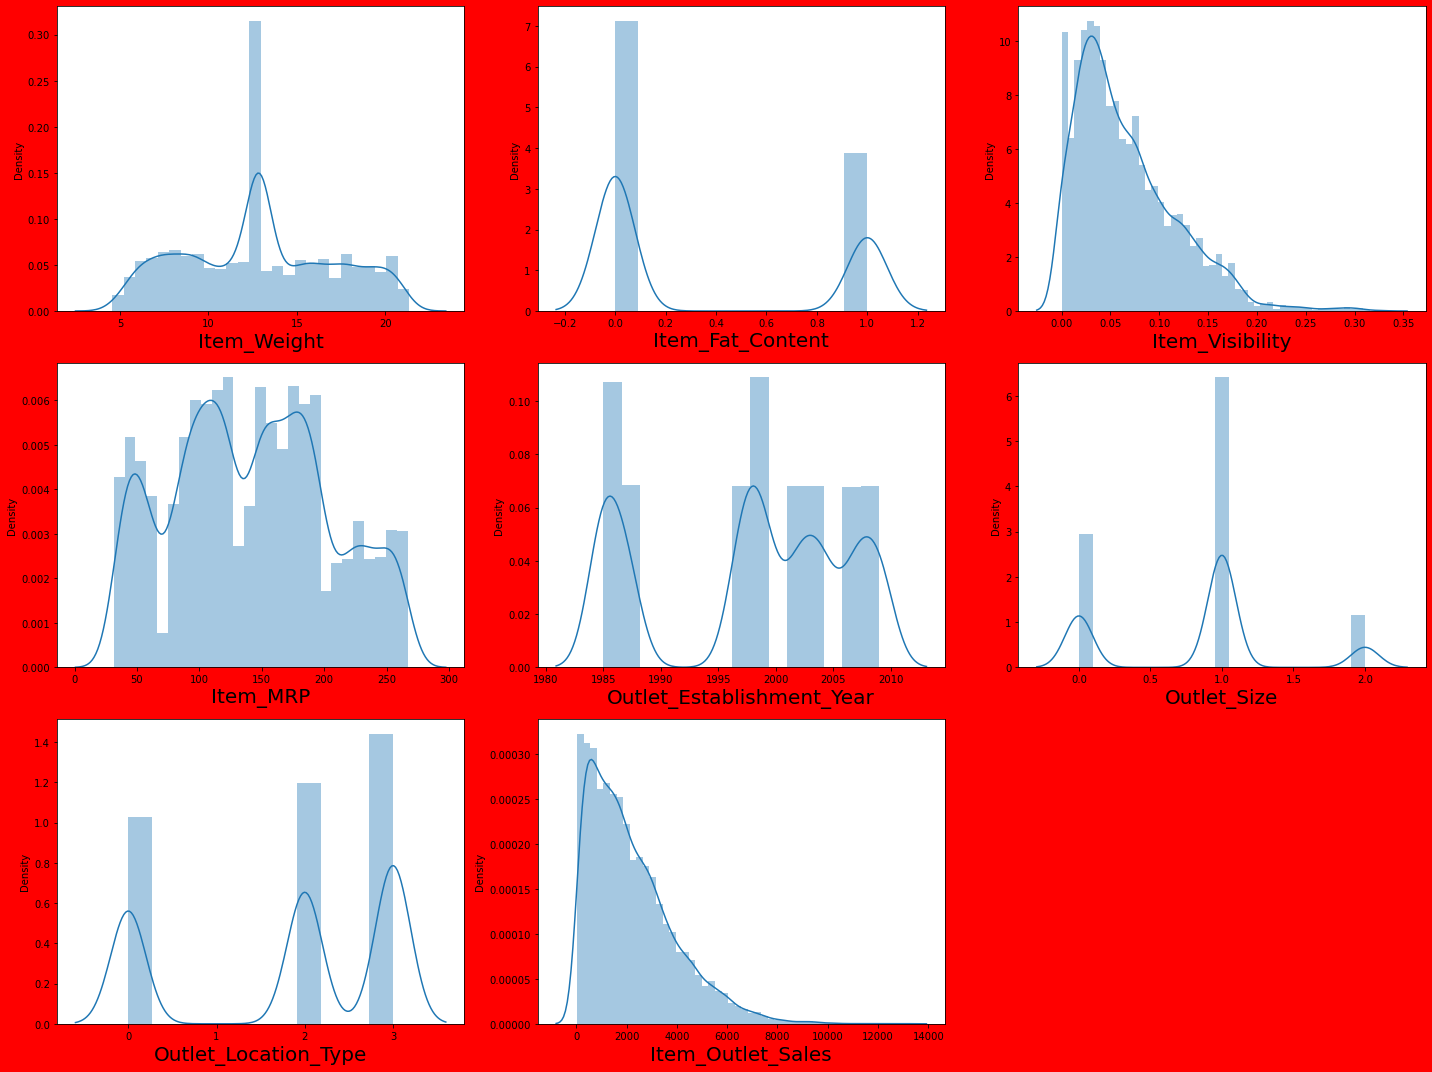

In [204]:
#now the data looks good and there is no missing valuues so we can start visualizing the type of distribution for each feature

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data_train:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [205]:
df_features=data_train.drop('Item_Outlet_Sales', axis=1)

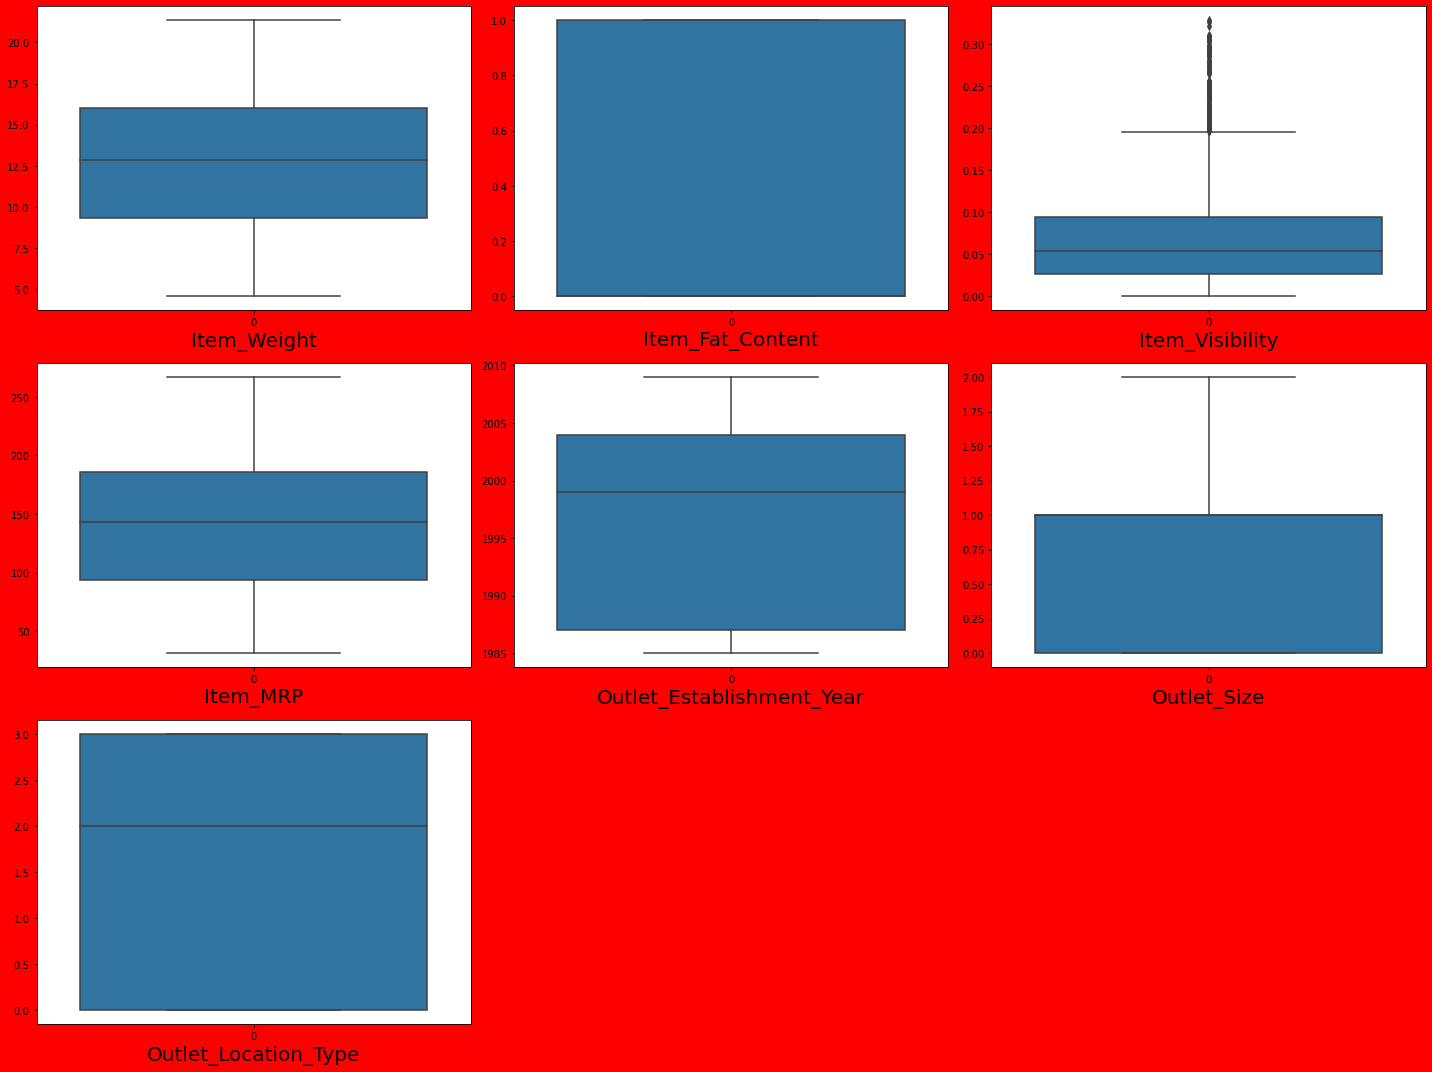

In [156]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [206]:
data_train.shape

(8523, 8)

In [207]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=data_train.quantile(0.25)
#3rd quantile
q3=data_train.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Item_Weight                     6.690000
Item_Fat_Content                1.000000
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Outlet_Size                     1.000000
Outlet_Location_Type            3.000000
Item_Outlet_Sales            2267.049000
dtype: float64

In [208]:
#removing the outliers for Item_Visibility
iv_high=q3.Item_Visibility + (1.5 * iqr.Item_Visibility)


index=np.where(data_train['Item_Visibility'] > iv_high)

data_train=data_train.drop(data_train.index[index])
print(data_train.shape)

data_train.reset_index()

(8379, 8)


,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380
1,1,5.920,1,0.019278,48.2692,2009,1,3,443.4228
2,2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700
3,3,19.200,1,0.000000,182.0950,1998,1,3,732.3800
4,4,8.930,0,0.000000,53.8614,1987,2,3,994.7052
...,...,...,...,...,...,...,...,...,...
8374,8518,6.865,0,0.056783,214.5218,1987,2,3,2778.3834
8375,8519,8.380,1,0.046982,108.1570,2002,1,2,549.2850
8376,8520,10.600,0,0.035186,85.1224,2004,0,2,1193.1136
8377,8521,7.210,1,0.145221,103.1332,2009,1,3,1845.5976


In [209]:
#now lets differentiate the featuresand lable
y=data_train['Item_Outlet_Sales']
x=data_train.drop(columns=['Item_Outlet_Sales'])

In [211]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,9.300,0,0.016047,249.8092,1999,1,0
1,5.920,1,0.019278,48.2692,2009,1,3
2,17.500,0,0.016760,141.6180,1999,1,0
3,19.200,1,0.000000,182.0950,1998,1,3
4,8.930,0,0.000000,53.8614,1987,2,3
...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2,3
8519,8.380,1,0.046982,108.1570,2002,1,2
8520,10.600,0,0.035186,85.1224,2004,0,2
8521,7.210,1,0.145221,103.1332,2009,1,3


In [210]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8379, dtype: float64

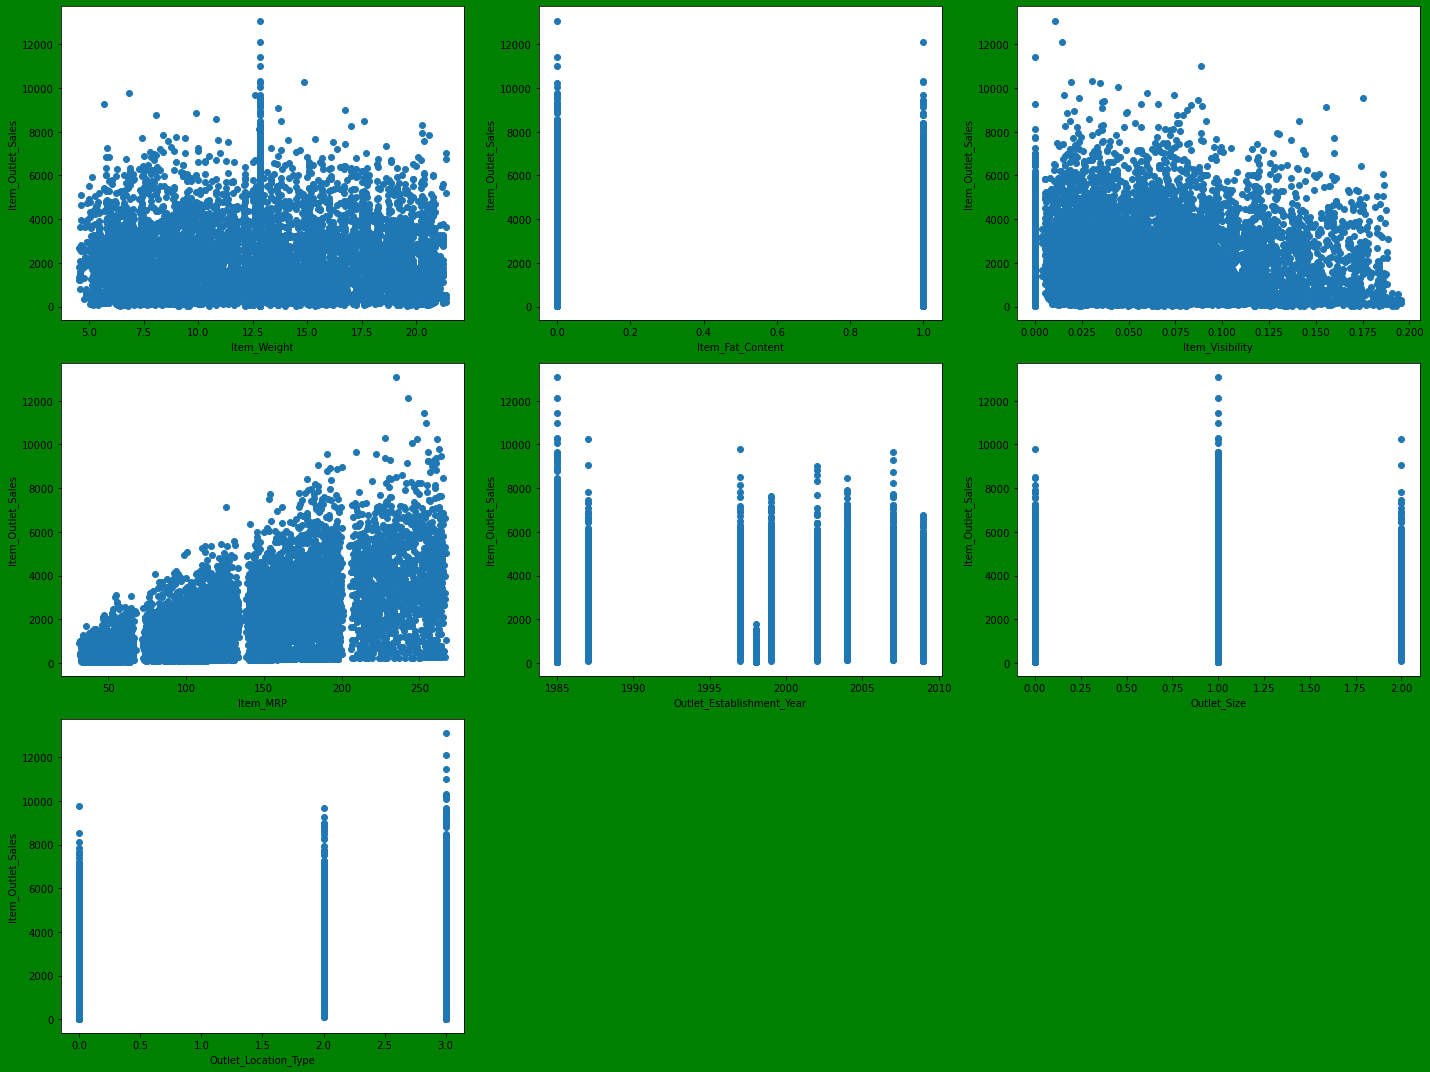

In [212]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Item_Outlet_Sales',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [215]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
y_train.head()


2389     419.4540
67      1118.5440
7206     111.8544
4591    1800.3232
777     4287.7520
Name: Item_Outlet_Sales, dtype: float64

In [216]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [217]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.34909391463092565

In [218]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [221]:
#prediction of Happiness_Score
print('sales is ', regression.predict([[7.315,0,0.015388,155.0340,2007,0,3]]))

sales is  [2503.18999962]
